In [1]:
import pandas as pd

# Specify the file path of the CSV file
file_path = "LoanExport.csv"

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Explore the dataset
print(df.head())  # Display the first few rows of the DataFrame


   CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  MIP  \
0            0            199902                  N        202901  16974   25   
1            0            199902                  N        202901  19740    0   
2            0            199902                  N        202901  29940    0   
3            0            199902                  N        202901  31084    0   
4            0            199902                  N        202901  35644    0   

   Units Occupancy  OCLTV  DTI  ...  PostalCode    LoanSeqNum  LoanPurpose  \
0      1         O     89   27  ...       60400  F199Q1268030            P   
1      1         O     73   17  ...       80200  F199Q1015092            N   
2      1         O     75   16  ...       66000  F199Q1266886            N   
3      1         O     76   14  ...       90700  F199Q1178167            N   
4      1         O     78   18  ...        7600  F199Q1178517            N   

  OrigLoanTerm NumBorrowers SellerName      

/tmp/ipykernel_486/3076435669.py:7: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [2]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [3]:
print(df.head()) 

   CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  MIP  \
0            0            199902                  N        202901  16974   25   
1            0            199902                  N        202901  19740    0   
2            0            199902                  N        202901  29940    0   
3            0            199902                  N        202901  31084    0   
4            0            199902                  N        202901  35644    0   

   Units Occupancy  OCLTV  DTI  ...  PostalCode    LoanSeqNum  LoanPurpose  \
0      1         O     89   27  ...       60400  F199Q1268030            P   
1      1         O     73   17  ...       80200  F199Q1015092            N   
2      1         O     75   16  ...       66000  F199Q1266886            N   
3      1         O     76   14  ...       90700  F199Q1178167            N   
4      1         O     78   18  ...        7600  F199Q1178517            N   

  OrigLoanTerm NumBorrowers SellerName      

In [4]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [5]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [6]:
print(df.isnull().sum().sort_values(ascending=False))

SellerName            24994
CreditScore               0
FirstPaymentDate          0
MonthsDelinquent          0
EverDelinquent            0
ServicerName              0
NumBorrowers              0
OrigLoanTerm              0
LoanPurpose               0
LoanSeqNum                0
PostalCode                0
PropertyType              0
PropertyState             0
ProductType               0
PPM                       0
Channel                   0
OrigInterestRate          0
LTV                       0
OrigUPB                   0
DTI                       0
OCLTV                     0
Occupancy                 0
Units                     0
MIP                       0
MSA                       0
MaturityDate              0
FirstTimeHomebuyer        0
MonthsInRepayment         0
dtype: int64


In [7]:
df.isnull().sum()/df.shape[0] *100

CreditScore           0.000000
FirstPaymentDate      0.000000
FirstTimeHomebuyer    0.000000
MaturityDate          0.000000
MSA                   0.000000
MIP                   0.000000
Units                 0.000000
Occupancy             0.000000
OCLTV                 0.000000
DTI                   0.000000
OrigUPB               0.000000
LTV                   0.000000
OrigInterestRate      0.000000
Channel               0.000000
PPM                   0.000000
ProductType           0.000000
PropertyState         0.000000
PropertyType          0.000000
PostalCode            0.000000
LoanSeqNum            0.000000
LoanPurpose           0.000000
OrigLoanTerm          0.000000
NumBorrowers          0.000000
SellerName            8.575713
ServicerName          0.000000
EverDelinquent        0.000000
MonthsDelinquent      0.000000
MonthsInRepayment     0.000000
dtype: float64

**seller name have 8.575713 % null values**

In [8]:
df.dropna(subset=['SellerName'], inplace=True)

In [9]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [10]:
print(df.isnull().sum().sort_values(ascending=False))

CreditScore           0
FirstPaymentDate      0
MonthsDelinquent      0
EverDelinquent        0
ServicerName          0
SellerName            0
NumBorrowers          0
OrigLoanTerm          0
LoanPurpose           0
LoanSeqNum            0
PostalCode            0
PropertyType          0
PropertyState         0
ProductType           0
PPM                   0
Channel               0
OrigInterestRate      0
LTV                   0
OrigUPB               0
DTI                   0
OCLTV                 0
Occupancy             0
Units                 0
MIP                   0
MSA                   0
MaturityDate          0
FirstTimeHomebuyer    0
MonthsInRepayment     0
dtype: int64


In [11]:
df[df.duplicated()]


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment


In [12]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


#**DATA LABELING**

In [13]:
def label_data(row):
    # Write your labeling logic here
    loan_amount = row['LoanAmount']
    if loan_amount > 50000:
        label = 'High'
    elif loan_amount > 20000:
        label = 'Medium'
    else:
        label = 'Low'
    
    return label


In [14]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [15]:
import pandas as pd

def label_loan_data(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Define the labeling logic
    def label_data(row):
        # Modify this function to define your labeling logic
        # Example: Label 'High' if LoanAmount > 50000, 'Low' otherwise
        loan_amount = row['LoanAmount']
        if loan_amount > 50000:
            label = 'High'
        else:
            label = 'Low'
        return label

    # Apply the labeling function to each row of the DataFrame
    df['Label'] = df.apply(label_data, axis=1)

    # Save the labeled DataFrame to a new CSV file
    labeled_csv_file = 'labeled_loan_data.csv'
    df.to_csv(labeled_csv_file, index=False)

print('Labeled data saved to: {labeled_csv_file}')


Labeled data saved to: {labeled_csv_file}


In [16]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


**##EXPLORATORY DATA ANALYSIS**

In [17]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [18]:
df.info

<bound method DataFrame.info of         CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  37964

In [19]:
df.describe

<bound method NDFrame.describe of         CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  379

In [20]:
data = pd.read_csv('labeled_loan_data.csv')

In [21]:
data.head

<bound method NDFrame.head of         CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
266452          839            199903                  N        202902  37964   
266453          840            200210                  N        202904  35644   
266454          840            200304                  N        202904  42044   
266455          845            199904                  N        202903  37964   
266456          849            199903                  N        202902  37964  

In [22]:
print(data.isnull().values.sum())

0


**#EXPLORATORY DATA ANLYSIS**

In [23]:
print("SellerName :\n",data.SellerName.value_counts(), "\n\n")

SellerName :
 Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: SellerName, dtype: int64 




In [24]:
print("SellerName \n",[data['SellerName'].mode().values[0]])

SellerName 
 ['Ot']


In [25]:
data['SellerName'] = data['SellerName'].fillna(
data['SellerName'].dropna().mode().values[0])

In [26]:
data['SellerName'].isnull().sum(),data['SellerName'].isnull().sum()

(0, 0)

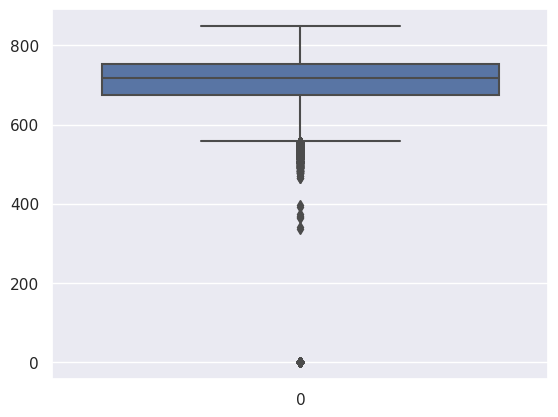

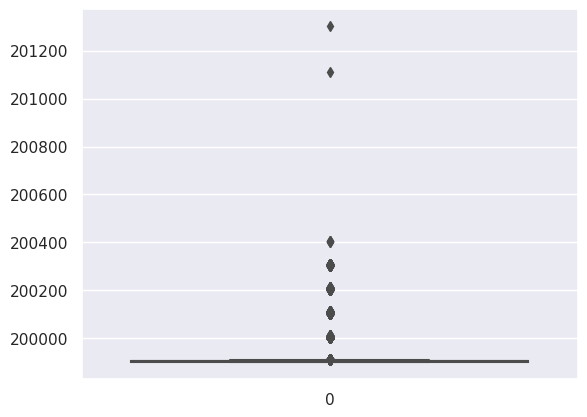

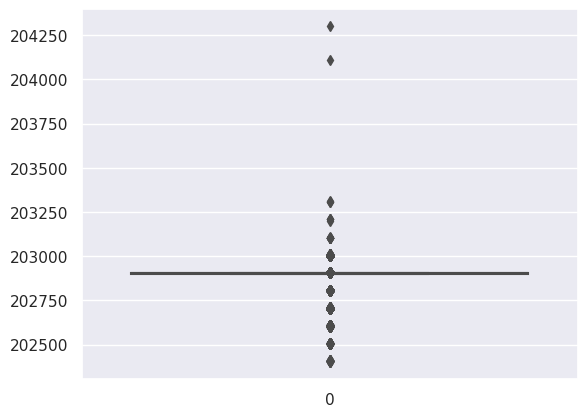

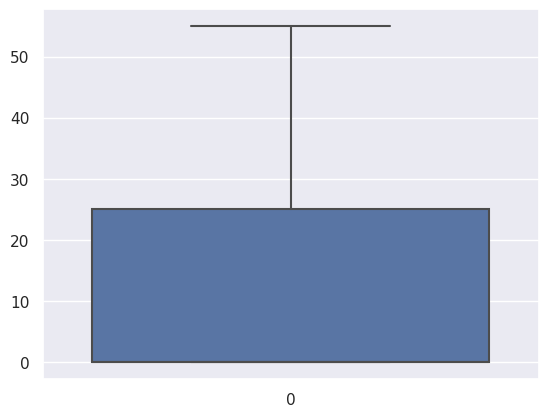

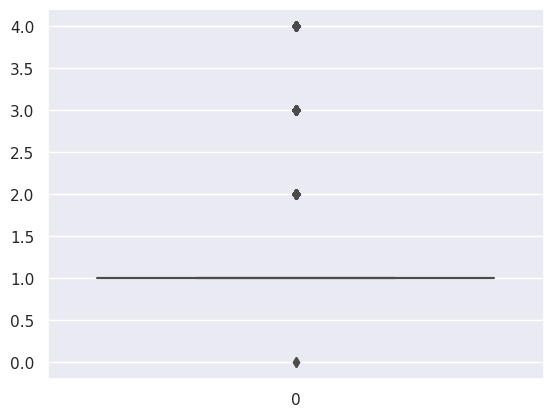

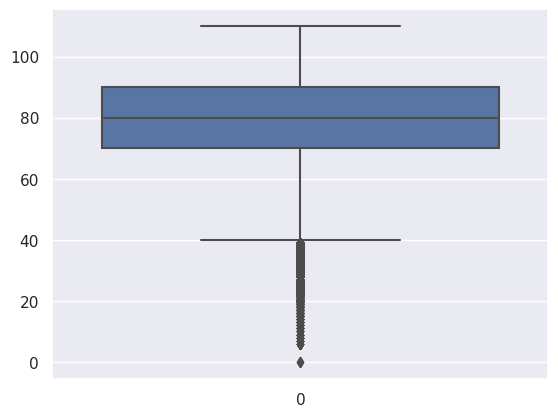

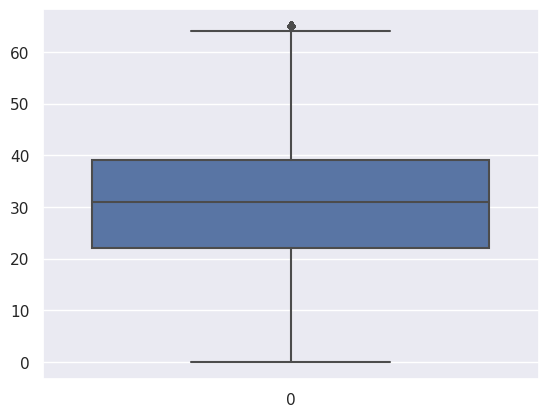

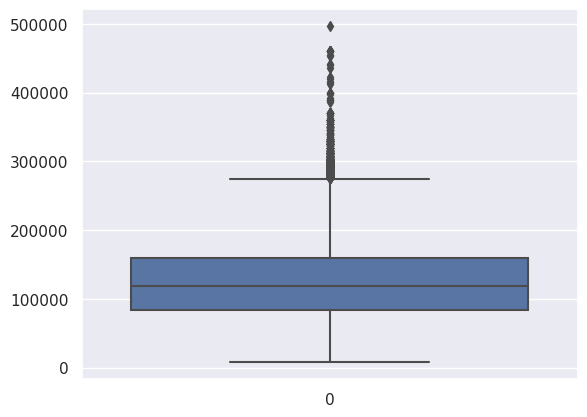

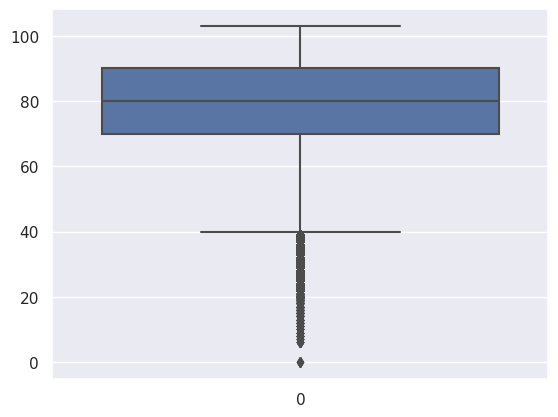

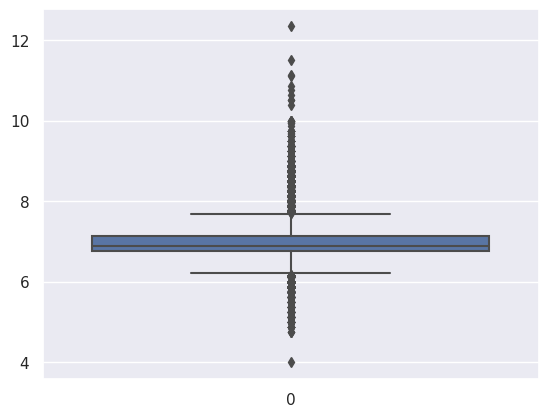

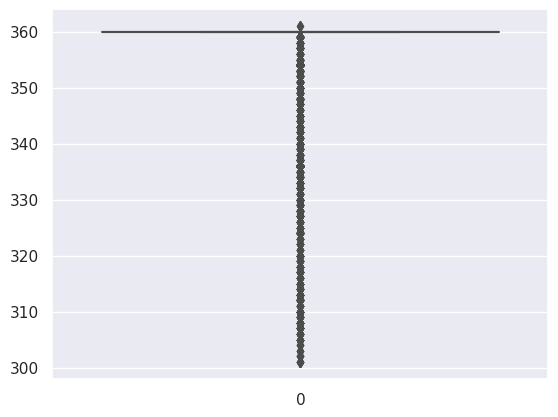

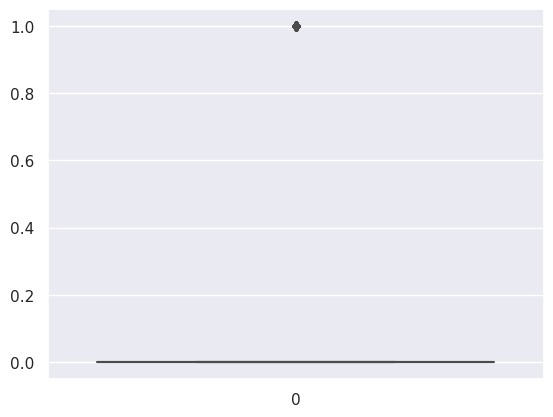

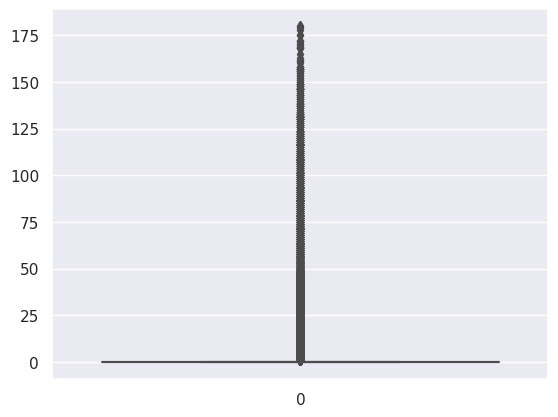

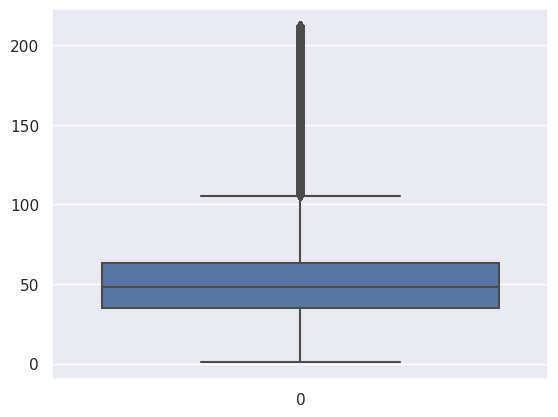

In [27]:
for i in data.describe().columns:
  sns.boxplot(data[i].dropna())
  plt.show()

In [28]:
print("loan_Export:\n")
print(data.info())

loan_Export:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266457 entries, 0 to 266456
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         266457 non-null  int64  
 1   FirstPaymentDate    266457 non-null  int64  
 2   FirstTimeHomebuyer  266457 non-null  object 
 3   MaturityDate        266457 non-null  int64  
 4   MSA                 266457 non-null  object 
 5   MIP                 266457 non-null  int64  
 6   Units               266457 non-null  int64  
 7   Occupancy           266457 non-null  object 
 8   OCLTV               266457 non-null  int64  
 9   DTI                 266457 non-null  int64  
 10  OrigUPB             266457 non-null  int64  
 11  LTV                 266457 non-null  int64  
 12  OrigInterestRate    266457 non-null  float64
 13  Channel             266457 non-null  object 
 14  PPM                 266457 non-null  object 
 15  ProductType         

In [29]:
#list of all the numeric columns
num = data.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = data.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  data[num]
#categoric df
BM_cat = data[cat]

print(num)
print(cat)

[data[category].value_counts() for category in cat[1:]]

['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment']
['FirstTimeHomebuyer', 'MSA', 'Occupancy', 'Channel', 'PPM', 'ProductType', 'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose', 'NumBorrowers', 'SellerName', 'ServicerName']


[X        36460
 31084     8297
 16974     8061
 47644     6474
 12060     6360
          ...  
 21940        3
 49500        2
 25020        1
 10380        1
 32420        1
 Name: MSA, Length: 392, dtype: int64,
 O    252566
 I      7903
 S      5988
 Name: Occupancy, dtype: int64,
 T    158052
 R    107997
 C       280
 B       128
 Name: Channel, dtype: int64,
 N    257512
 X      5376
 Y      3569
 Name: PPM, dtype: int64,
 FRM      266457
 Name: ProductType, dtype: int64,
 CA    39179
 FL    16741
 MI    15692
 IL    12385
 TX    11435
 OH    10327
 WA     9602
 GA     9241
 CO     9190
 NC     8961
 AZ     8357
 NY     7588
 PA     7134
 NJ     7102
 VA     7073
 OR     6337
 MA     6076
 IN     5560
 MD     4916
 UT     4700
 MO     4672
 MN     4620
 WI     4405
 TN     4119
 AL     4060
 SC     3780
 KY     3394
 NV     3311
 CT     3193
 ID     2181
 KS     2052
 LA     1933
 NM     1863
 IA     1746
 OK     1551
 NE     1487
 NH     1249
 VT      908
 MS      877
 MT      

In [30]:
data['LoanPurpose'].replace(['P', 'N', 'C'], 
                                  ['Purchase','No_Cash_Out','Cash_Out'],inplace = True)

In [31]:
#check result
data.LoanPurpose.value_counts()

Purchase       111720
No_Cash_Out    100238
Cash_Out        54499
Name: LoanPurpose, dtype: int64

In [32]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,Purchase,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,No_Cash_Out,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,No_Cash_Out,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,No_Cash_Out,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,No_Cash_Out,360,2,GM,GMACMTGECORP,0,0,54


**#UNIVARIATES PLOTS**

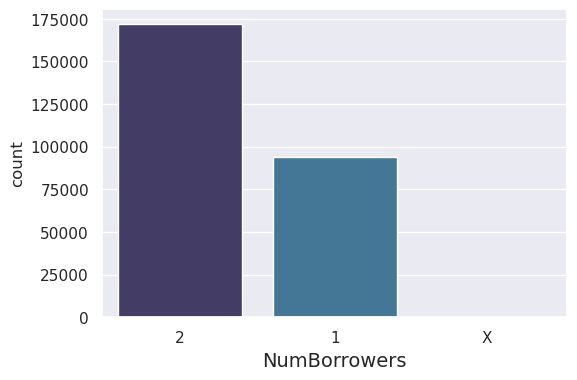

In [33]:
#categorical columns:
['FirstPaymentDate', 'MIP', 'OCLTV', 'DTI', 
 'Units', 'OrigLoanTerm', 'NumBorrowers']
 
plt.figure(figsize=(6,4))
sns.countplot(x='NumBorrowers',data=data,palette='mako')
plt.xlabel('NumBorrowers', fontsize=14)
plt.show()

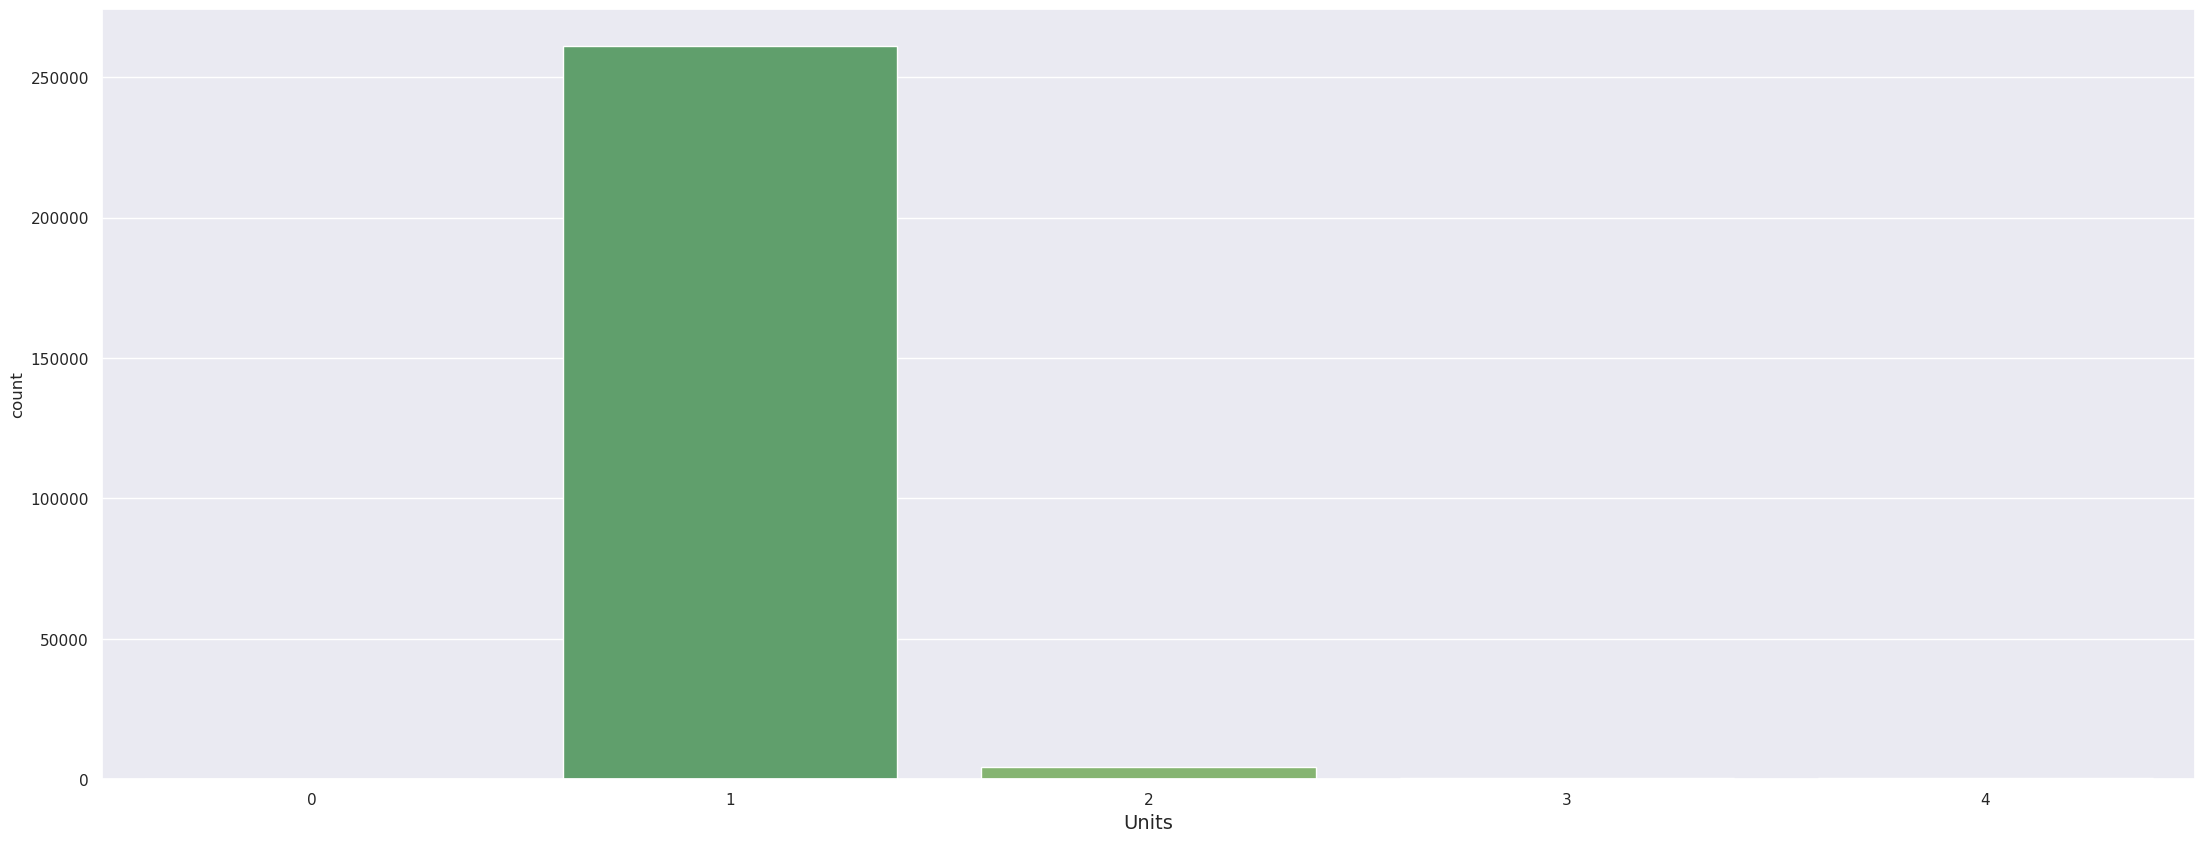

In [34]:
plt.figure(figsize=(27,10))
sns.countplot(x='Units' , data=data ,palette='summer')
plt.xlabel('Units', fontsize=14)
plt.show()

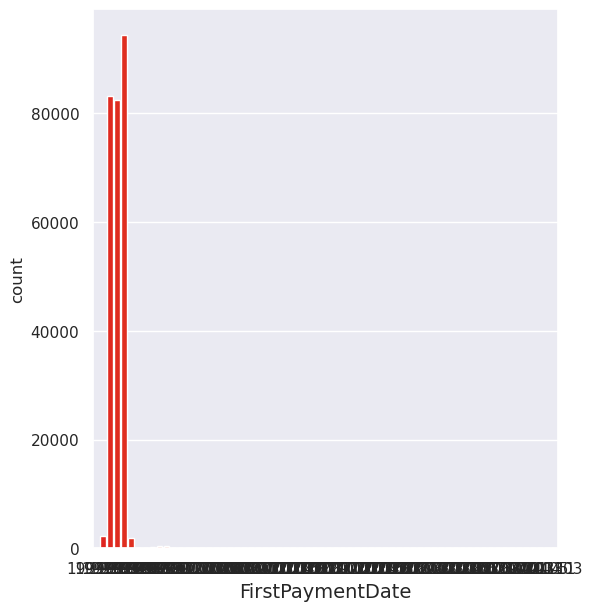

In [35]:
plt.figure(figsize=(6,7))
sns.countplot(x='FirstPaymentDate' , data=data ,palette='autumn')
plt.xlabel('FirstPaymentDate', fontsize=14)
plt.show()

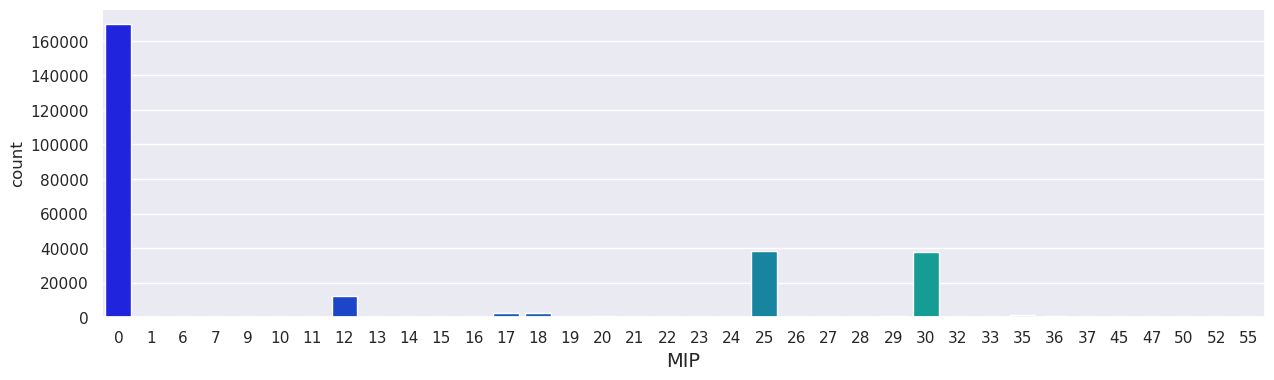

In [36]:
plt.figure(figsize=(15,4))
sns.countplot(x='MIP' , data=data ,palette='winter')
plt.xlabel('MIP', fontsize=14)
plt.show()

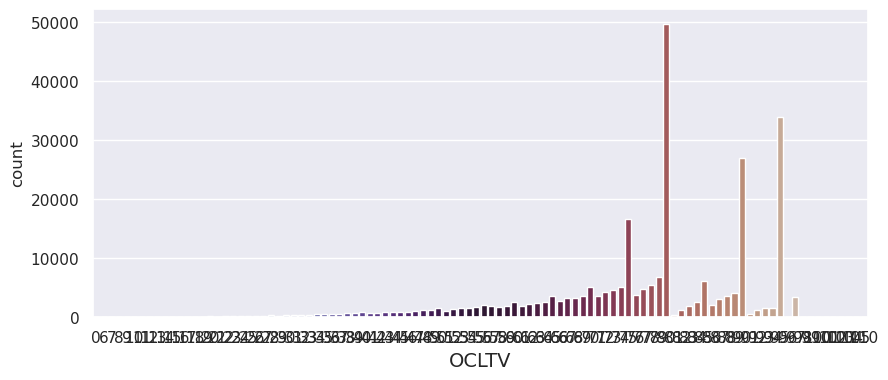

In [37]:
plt.figure(figsize=(10,4))
sns.countplot(x='OCLTV' , data=data ,palette='twilight')
plt.xlabel('OCLTV', fontsize=14)
plt.show()

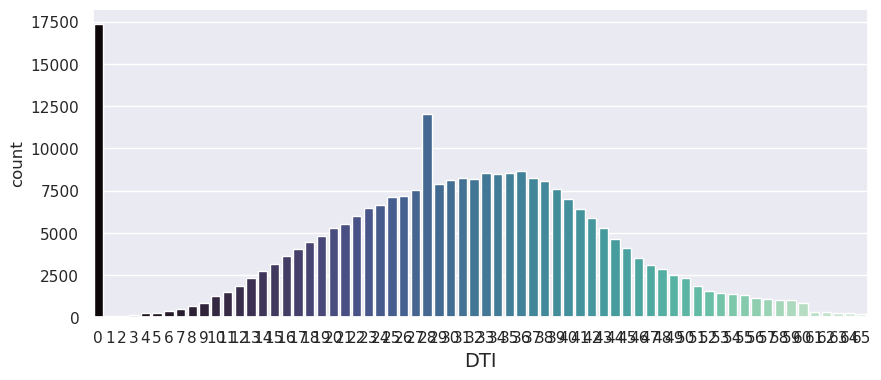

In [38]:
plt.figure(figsize=(10,4))
sns.countplot(x='DTI' , data=data ,palette='mako')
plt.xlabel('DTI', fontsize=14)
plt.show()

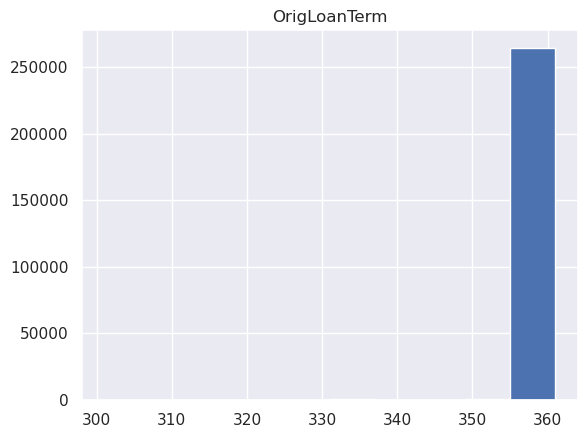

In [39]:
#list of all the numeric columns
num = data.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  data[num]

plt.hist(data['OrigLoanTerm'])
plt.title("OrigLoanTerm")
plt.show()

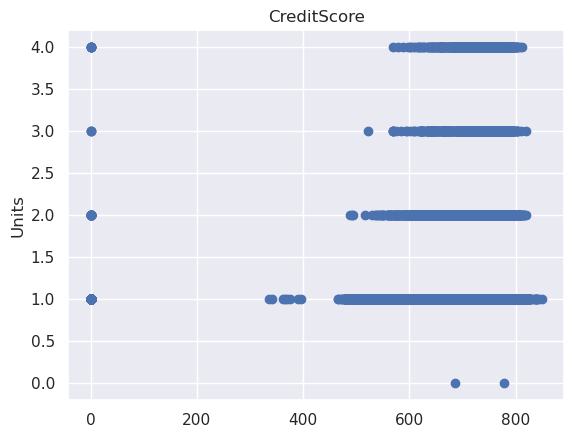

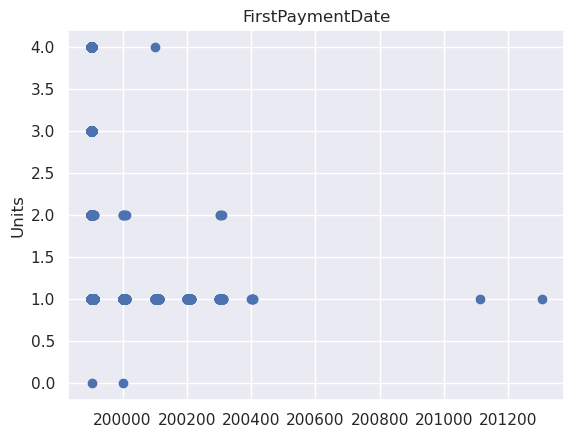

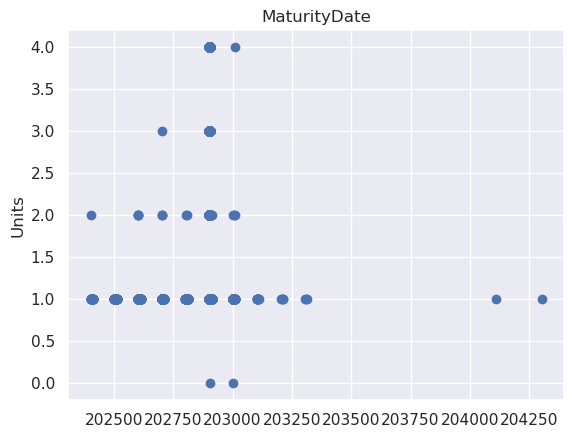

In [40]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Units'])
    plt.title(numeric)
    plt.ylabel('Units')
    plt.show()

**## MULTIVARIATE PLOTS**

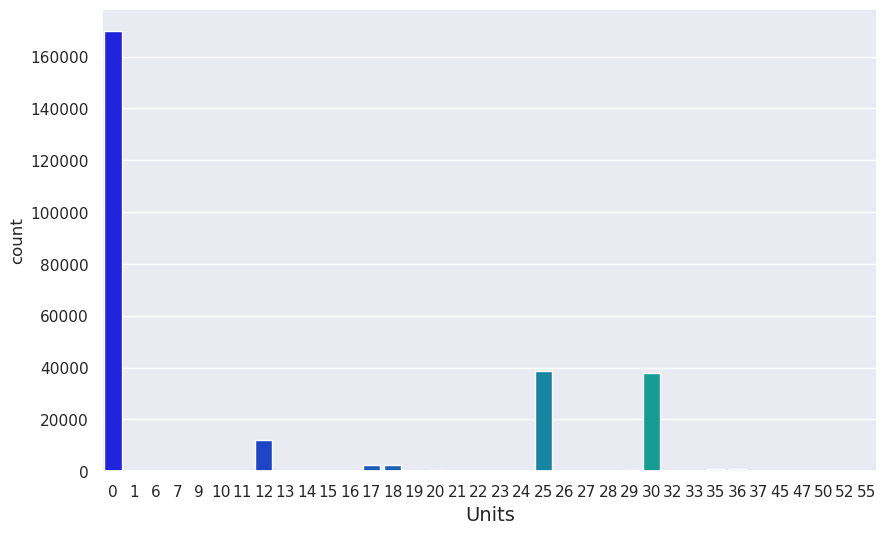

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x='MIP' , data=data ,palette='winter')
plt.xlabel('Units', fontsize=14)
plt.show()

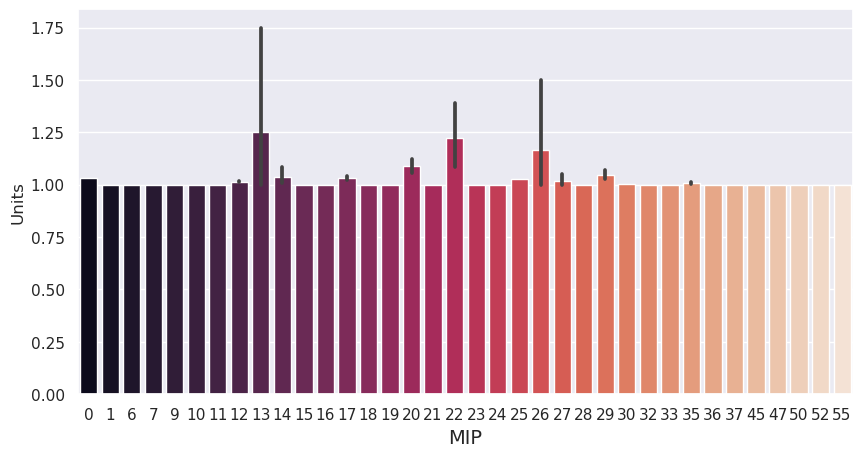

In [42]:
plt.figure(figsize=(10, 5))
sns.barplot(x='MIP', y='Units', data=data, palette='rocket')
plt.xlabel('MIP', fontsize=14)
plt.show() 

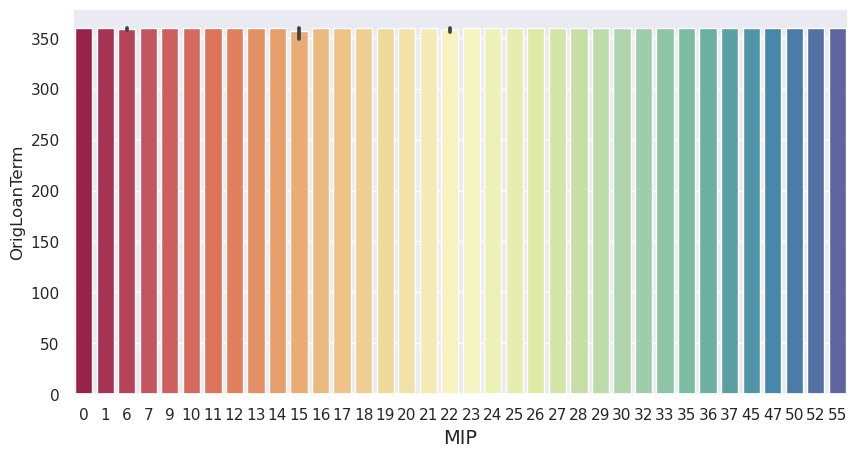

In [43]:
plt.figure(figsize=(10, 5))
sns.barplot(x='MIP', y='OrigLoanTerm', data=data, palette='Spectral')
plt.xlabel('MIP', fontsize=14)
plt.show()

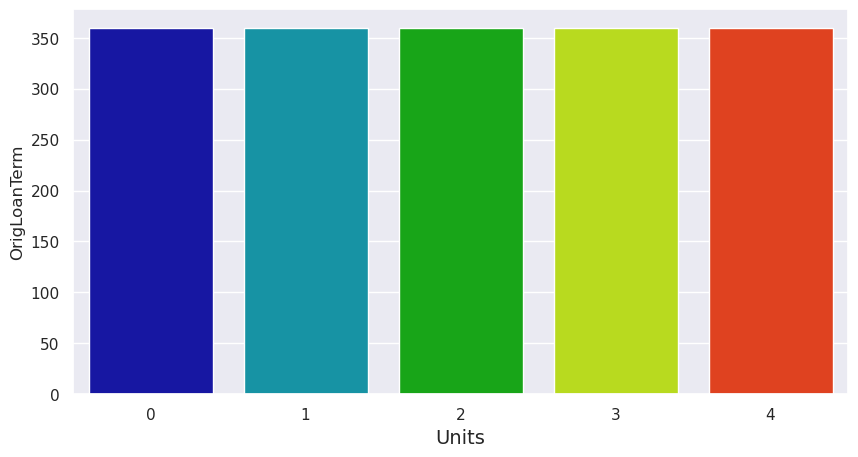

In [44]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Units', y='OrigLoanTerm', data=data, palette='nipy_spectral')
plt.xlabel('Units', fontsize=14)
plt.show()

<Axes: >

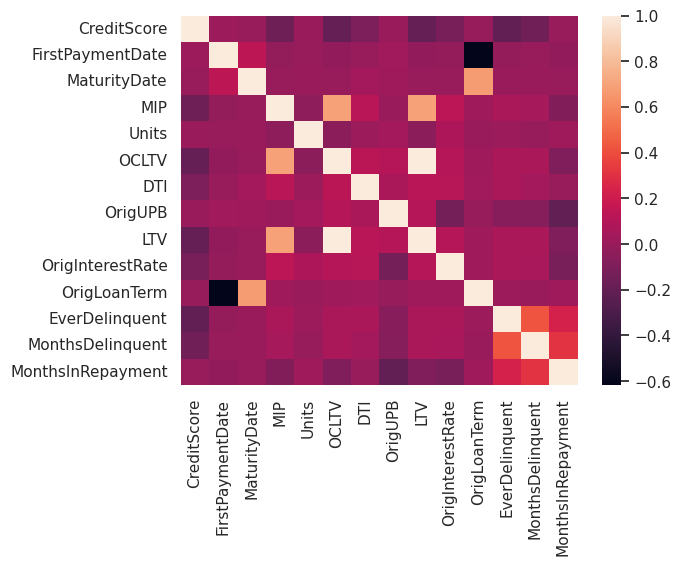

In [45]:
#plotting the correlation matrix
sns.heatmap(data.corr() ,cmap='rocket')

**bivariate plots**

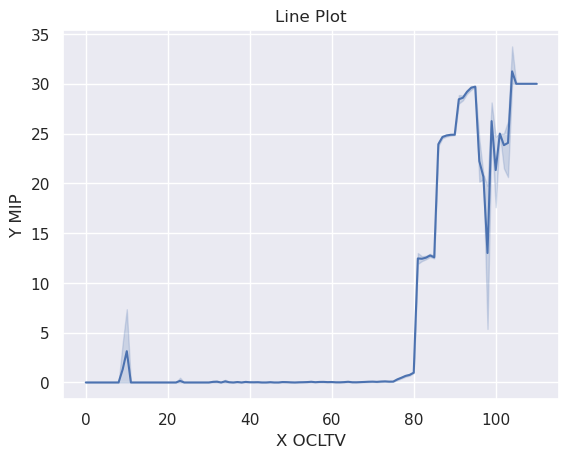

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='OCLTV', y='MIP', data=data)
plt.xlabel('X OCLTV')
plt.ylabel('Y MIP')
plt.title('Line Plot')
plt.show()


**###FEATURE ENGINEERING**

In [47]:
BM_cat.apply(lambda x: x.nunique()) #checking the number of unique values in each column

FirstTimeHomebuyer         3
MSA                      392
Occupancy                  3
Channel                    4
PPM                        3
ProductType                1
PropertyState             53
PropertyType               7
PostalCode              1765
LoanSeqNum            266457
LoanPurpose                3
NumBorrowers               3
SellerName                20
ServicerName              20
dtype: int64

In [48]:
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [49]:
y = data.CreditScore

****####ML BUILDING****

In [50]:
loan_features = ['MIP' , 'DTI' , 'OCLTV' , 'Units']

In [51]:
X = data[loan_features]

In [52]:
X.describe()

,MIP,DTI,OCLTV,Units
count,266457.000000,266457.000000,266457.000000,266457.000000
mean,9.121085,30.038708,76.883970,1.025907
std,12.619794,13.338958,15.192873,0.202276
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,70.000000,1.000000
50%,0.000000,31.000000,80.000000,1.000000
75%,25.000000,39.000000,90.000000,1.000000
max,55.000000,65.000000,110.000000,4.000000


In [53]:
X.head()

,MIP,DTI,OCLTV,Units
0,25,27,89,1
1,0,17,73,1
2,0,16,75,1
3,0,14,76,1
4,0,18,78,1


**feature engineering**

In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Perform feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['OrigUPB', 'OrigLoanTerm']])

data['Scaled UPB'] = scaled_features[:, 0]
data['Scaled Loan Term'] = scaled_features[:, 1]

# Extract new features
data['Loan-to-Value Ratio'] = data['OrigUPB'] / data['OrigInterestRate']
data['Monthly Payment'] = data['OrigInterestRate'] / data['OrigLoanTerm']

data['Scaled UPB'] = scaled_features[:, 0]
data['Scaled Loan Term'] = scaled_features[:, 1]

# Print the updated dataset
print(data.head())


   CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  MIP  \
0            0            199902                  N        202901  16974   25   
1            0            199902                  N        202901  19740    0   
2            0            199902                  N        202901  29940    0   
3            0            199902                  N        202901  31084    0   
4            0            199902                  N        202901  35644    0   

   Units Occupancy  OCLTV  DTI  ...  NumBorrowers  SellerName  \
0      1         O     89   27  ...             2          FL   
1      1         O     73   17  ...             1          FT   
2      1         O     75   16  ...             2          FL   
3      1         O     76   14  ...             2          GM   
4      1         O     78   18  ...             2          GM   

           ServicerName EverDelinquent MonthsDelinquent MonthsInRepayment  \
0  WASHINGTONMUTUALBANK              0       

In [55]:
# Perform feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['MIP', 'DTI', 'OCLTV', 'Units']])

data['Scaled MIP'] = scaled_features[:, 0]
data['Scaled DTI'] = scaled_features[:, 1]
data['Scaled OCLTV'] = scaled_features[:, 2]
data['Scaled Units'] = scaled_features[:, 3]

# Drop original columns
data.drop(['MIP', 'DTI', 'OCLTV', 'Units'], axis=1, inplace=True)

In [56]:
data.head

<bound method NDFrame.head of         CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
266452          839            199903                  N        202902  37964   
266453          840            200210                  N        202904  35644   
266454          840            200304                  N        202904  42044   
266455          845            199904                  N        202903  37964   
266456          849            199903                  N        202902  37964  

In [57]:
# Define credit score ranges and corresponding labels
credit_score_ranges = [(0, 599), (600, 679), (680, 719), (720, 900)]
credit_score_labels = ['Poor', 'Fair', 'Good', 'Excellent']

# Create a new column 'Credit Score Range' based on the credit score ranges
data['Credit Score Range'] = pd.cut(data['CreditScore'], bins=[range[0] - 1 for range in credit_score_ranges] + [credit_score_ranges[-1][1]], labels=credit_score_labels)


In [58]:
print(data.head())

   CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0            0            199902                  N        202901  16974   
1            0            199902                  N        202901  19740   
2            0            199902                  N        202901  29940   
3            0            199902                  N        202901  31084   
4            0            199902                  N        202901  35644   

  Occupancy  OrigUPB  LTV  OrigInterestRate Channel  ... MonthsInRepayment  \
0         O   117000   89             6.750       T  ...                52   
1         O   109000   73             6.500       R  ...               144   
2         O    88000   75             6.875       T  ...                67   
3         O   160000   76             6.875       R  ...                35   
4         O   109000   78             7.125       R  ...                54   

  Scaled UPB Scaled Loan Term Loan-to-Value Ratio Monthly Payment Scaled M

In [59]:
print(data.tail())

        CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
266452          839            199903                  N        202902  37964   
266453          840            200210                  N        202904  35644   
266454          840            200304                  N        202904  42044   
266455          845            199904                  N        202903  37964   
266456          849            199903                  N        202902  37964   

       Occupancy  OrigUPB  LTV  OrigInterestRate Channel  ...  \
266452         O    90000   60             7.000       R  ...   
266453         O   267000   73             6.375       C  ...   
266454         O    87000   73             5.625       R  ...   
266455         I    88000   80             7.000       R  ...   
266456         O    70000   47             7.000       R  ...   

       MonthsInRepayment Scaled UPB Scaled Loan Term Loan-to-Value Ratio  \
266452                12  -0.659292         0.

In [60]:
ltv_ranges = [(0, 80), (80, 90), (90, 100)]
ltv_labels = ['Low', 'Medium', 'High']

# Create a new column 'LTV Category' based on the LTV ranges
data['LTV Category'] = pd.cut(data['LTV'], bins=[range[0] - 1 for range in ltv_ranges] + [ltv_ranges[-1][1]], labels=ltv_labels)

# Print the updated dataset
print(data.head())

   CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0            0            199902                  N        202901  16974   
1            0            199902                  N        202901  19740   
2            0            199902                  N        202901  29940   
3            0            199902                  N        202901  31084   
4            0            199902                  N        202901  35644   

  Occupancy  OrigUPB  LTV  OrigInterestRate Channel  ... Scaled UPB  \
0         O   117000   89             6.750       T  ...  -0.154160   
1         O   109000   73             6.500       R  ...  -0.303829   
2         O    88000   75             6.875       T  ...  -0.696709   
3         O   160000   76             6.875       R  ...   0.650310   
4         O   109000   78             7.125       R  ...  -0.303829   

  Scaled Loan Term Loan-to-Value Ratio Monthly Payment Scaled MIP Scaled DTI  \
0         0.073653        17333.3333

In [69]:
# Convert 'FirstTimeHomeBuyer' column to numerical values
label_encoder = LabelEncoder()
data['FirstTimeHomebuyer'] = label_encoder.fit_transform(data['FirstTimeHomebuyer'])


In [71]:
data['YearsInRepayment'] = data['MonthsInRepayment'] / 12

In [72]:
data['YearsInRepayment'].head()

0     4.333333
1    12.000000
2     5.583333
3     2.916667
4     4.500000
Name: YearsInRepayment, dtype: float64

In [73]:
data['MonthsInRepayment'].head()

0     52
1    144
2     67
3     35
4     54
Name: MonthsInRepayment, dtype: int64

In [78]:
range_limits = [0, 4, 8, 12, 16, np.inf]
range_labels = ['Range 1', 'Range 2', 'Range 3', 'Range 4', 'Range 5']

# Create a new column 'RepayRange' based on the ranges
data['RepayRange'] = pd.cut(data['YearsInRepayment'], bins=range_limits, labels=range_labels, right=False)


In [81]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,Occupancy,OrigUPB,LTV,OrigInterestRate,Channel,...,Loan-to-Value Ratio,Monthly Payment,Scaled MIP,Scaled DTI,Scaled OCLTV,Scaled Units,Credit Score Range,LTV Category,YearsInRepayment,RepayRange
0,0,199902,0,202901,16974,O,117000,89,6.750,T,...,17333.333333,0.018750,1.258257,-0.227807,0.797483,-0.128076,Poor,Medium,4.333333,Range 2
1,0,199902,0,202901,19740,O,109000,73,6.500,R,...,16769.230769,0.018056,-0.722762,-0.977493,-0.255645,-0.128076,Poor,Low,12.000000,Range 4
2,0,199902,0,202901,29940,O,88000,75,6.875,T,...,12800.000000,0.019097,-0.722762,-1.052461,-0.124004,-0.128076,Poor,Low,5.583333,Range 2
3,0,199902,0,202901,31084,O,160000,76,6.875,R,...,23272.727273,0.019097,-0.722762,-1.202398,-0.058183,-0.128076,Poor,Low,2.916667,Range 1
4,0,199902,0,202901,35644,O,109000,78,7.125,R,...,15298.245614,0.019792,-0.722762,-0.902524,0.073458,-0.128076,Poor,Low,4.500000,Range 2
